#### Odds Data Concatenation

In this notebook, we simply take yearly odds csv files and concatenate them, writing out a file with the concatenated data.

In [231]:
from tennis_new.infra.defs import REPO_DIR
from pathlib import Path

BASE_PATH = Path.joinpath(REPO_DIR, 'fetch/odds_data/')
TARGET_FILES = list(BASE_PATH.glob('*.xls*'))

In [232]:
CSV_FILES = list(BASE_PATH.glob('*.csv'))
pd.read_csv(CSV_FILES[-1])

,ATP,Location,Tournament,Date,Series,Court,Surface,Round,Best of,Winner,...,Lsets,Comment,B365W,B365L,PSW,PSL,MaxW,MaxL,AvgW,AvgL
0,1,Brisbane,Brisbane International,12/31/18,ATP250,Outdoor,Hard,1st Round,3,Dimitrov G.,...,0.0,Completed,1.36,3.00,1.36,3.37,1.42,3.60,1.35,3.18
1,1,Brisbane,Brisbane International,12/31/18,ATP250,Outdoor,Hard,1st Round,3,Raonic M.,...,0.0,Completed,1.18,4.50,1.23,4.68,1.27,4.84,1.22,4.26
2,1,Brisbane,Brisbane International,12/31/18,ATP250,Outdoor,Hard,1st Round,3,Kecmanovic M.,...,0.0,Completed,1.57,2.25,1.67,2.32,1.71,2.40,1.63,2.28
3,1,Brisbane,Brisbane International,12/31/18,ATP250,Outdoor,Hard,1st Round,3,Millman J.,...,1.0,Completed,1.40,2.75,1.41,3.13,1.45,3.20,1.40,2.95
4,1,Brisbane,Brisbane International,12/31/18,ATP250,Outdoor,Hard,1st Round,3,Uchiyama Y.,...,0.0,Completed,2.62,1.44,2.73,1.51,3.26,1.53,2.69,1.47
5,1,Brisbane,Brisbane International,1/1/19,ATP250,Outdoor,Hard,1st Round,3,Kudla D.,...,1.0,Completed,2.62,1.44,2.80,1.49,2.85,1.55,2.70,1.47
6,1,Brisbane,Brisbane International,1/1/19,ATP250,Outdoor,Hard,1st Round,3,Chardy J.,...,1.0,Completed,2.10,1.66,2.23,1.72,2.26,1.74,2.19,1.68
7,1,Brisbane,Brisbane International,1/1/19,ATP250,Outdoor,Hard,1st Round,3,Murray A.,...,0.0,Completed,1.28,3.50,1.38,3.29,1.39,3.60,1.34,3.26
8,1,Brisbane,Brisbane International,1/1/19,ATP250,Outdoor,Hard,1st Round,3,Kyrgios N.,...,1.0,Completed,1.40,2.75,1.47,2.87,1.50,3.16,1.44,2.80
9,1,Brisbane,Brisbane International,1/1/19,ATP250,Outdoor,Hard,1st Round,3,Tsonga J.W.,...,0.0,Completed,2.25,1.57,2.27,1.70,2.42,1.71,2.27,1.64


In [233]:
odds_dfs = [pd.read_csv(x) for x in CSV_FILES]

In [234]:
odds_dfs[0].columns

Index(['ATP', 'Location', 'Tournament', 'Date', 'Series', 'Court', 'Surface',
       'Round', 'Best of', 'Winner', 'Loser', 'WRank', 'LRank', 'W1', 'L1',
       'W2', 'L2', 'W3', 'L3', 'W4', 'L4', 'W5', 'L5', 'Wsets', 'Lsets',
       'Comment', 'CBW', 'CBL', 'GBW', 'GBL', 'IWW', 'IWL', 'SBW', 'SBL'],
      dtype='object')

In [235]:
years = [int(str(x)[-8:-4]) for x in CSV_FILES]
for cur_df, year in zip(odds_dfs, years):
    cur_df['year'] = year

In [236]:
# TODO: Make all cols but odds
rel_cols = [
    'ATP',
    'Location',
    'Tournament',
    'Date',
    'Series',
    'Court', 
    'Surface',
    'Round', 
    'Best of', 
    'Winner',
    'Loser',
    'WRank',
    'LRank',
    'W1',
    'L1',
    'W2',
    'L2', 
    'W3',
    'L3',
    'W4',
    'L4',
    'W5',
    'L5',
    'Wsets',
    'Lsets',
    'Comment',
    'B365W',
    'B365L',
    'year'
]

In [237]:
all_odds = pd.concat([
    x[rel_cols] for x in odds_dfs[1:]
])

In [238]:
all_odds.shape

(48777, 29)

In [239]:
all_odds['year'].value_counts()

2006    2909
2005    2909
2004    2877
2003    2861
2002    2854
2007    2806
2009    2731
2008    2707
2010    2679
2011    2675
2018    2637
2017    2633
2013    2631
2015    2630
2016    2626
2012    2607
2014    2600
2019    2405
Name: year, dtype: int64

In [240]:
all_odds.to_csv('./all_odds.csv')

In [213]:
yearly_perf = all_odds[
    (all_odds['Comment'] == 'Completed') &
    (all_odds['Surface'] == 'Hard')
].groupby('year').apply(
    lambda x: (x['B365L'] >= x['B365W']).mean()
).reset_index()

In [205]:
yearly_perf

,year,0
0,2002,0.324168
1,2003,0.665916
2,2004,0.625866
3,2005,0.691295
4,2006,0.681022
5,2007,0.709970
6,2008,0.696875
7,2009,0.724138
8,2010,0.707941
9,2011,0.726712


In [206]:
yearly_perf.columns = ['year', 'accuracy']

Text(0.5, 1.0, 'Casino Performance per Year')

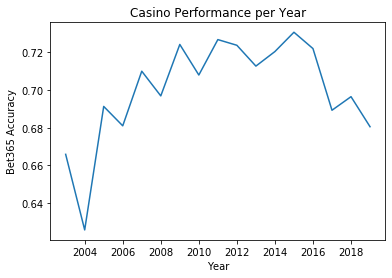

In [207]:
%matplotlib inline
from matplotlib import pyplot as plt

rel = yearly_perf[yearly_perf['accuracy'] > 0.5]
plt.plot(rel['year'], rel['accuracy'])
plt.xlabel("Year")
plt.ylabel("Bet365 Accuracy")
plt.title("Casino Performance per Year")

The Casino's performance is not just skyrocketing...Seems like you could make a shitload of money in 2004 though :/